In [1]:
import glob
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import math
import imblearn
from scipy import stats

from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv("ALL.csv")
print(df.shape)
df.sort_index(inplace = True)
df.insert(12, 'Activity', df.pop('Activity'))
df

(316496, 14)


,x,y,z,ba_x,ba_y,ba_z,g_x,g_y,g_z,ACC,BA,G,Activity,class
0,-0.74,-0.62,0.27,-0.292940,-0.245440,0.106880,-0.016241,-0.013608,0.005926,1.00240,0.396830,0.022001,Still,0
1,-0.74,-0.62,0.27,0.073900,0.061917,-0.026964,-0.092895,-0.077831,0.033894,1.00240,0.100110,0.125840,Still,0
2,-0.74,-0.62,0.27,0.073861,0.061883,-0.026949,-0.257940,-0.216110,0.094111,1.00240,0.100060,0.349410,Still,0
3,-0.74,-0.62,0.27,-0.037065,-0.031054,0.013524,-0.474780,-0.397790,0.173230,1.00240,0.050210,0.643170,Still,0
4,-0.74,-0.62,0.27,0.017824,0.014934,-0.006503,-0.474780,-0.397790,0.173230,1.00240,0.024146,0.643170,Still,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316491,-0.98,-0.09,0.17,0.001308,-0.000360,-0.002556,-0.625840,-0.055514,0.100980,0.99870,0.002894,0.636360,Walking,0
316492,-0.98,-0.09,0.16,-0.000650,0.001672,-0.004187,-0.628770,-0.054813,0.105920,0.99705,0.004555,0.639980,Walking,0
316493,-0.97,-0.09,0.16,0.004271,-0.000824,0.001130,-0.628550,-0.057744,0.107820,0.98722,0.004494,0.640340,Walking,0
316494,-0.98,-0.10,0.16,-0.005107,-0.003563,0.000934,-0.627730,-0.057963,0.105590,0.99800,0.006297,0.639180,Walking,0


In [3]:
def time(df1):
    num = len(df1['x'])
    t=[]
    i=0
    j=0
    N=16
    while i<num/N:
        while j<N:
            t.append(i)
            j+=1
            if len(t)==num:
                break
        i+=1
        j=0
    df1["time"]=t


def mov_avg(axis):
    window_size = 16
    numbers_series = pd.Series(axis)
    windows = numbers_series.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
    #final_list = moving_averages_list[window_size-1:]
    return moving_averages_list

In [4]:
time(df)
#--------------------------X AXIS--------------------------
x = pd.Series(data=df['x'])
x = mov_avg(x)
x = pd.Series(x)
#--------------------------Y AXIS--------------------------
y = pd.Series(data=df['y'])
y = mov_avg(y)
y = pd.Series(y)
#--------------------------Z AXIS--------------------------
z = pd.Series(data=df['z'])
z = mov_avg(z)
z = pd.Series(z)

d = {'x': x, 'y': y, 'z':z, 'time': df['time'], 'ba_x': df['ba_x'].round(6), 'ba_y':df['ba_y'].round(6), 'ba_z': df['ba_z'].round(6), 'g_x': df['g_x'], 'g_y':df['g_y'], 'g_z':df['g_z'], 'BA':df['BA'], 'G':df['G'], 'class':df['class'], 'Activity':df['Activity'],}
df2 = pd.DataFrame(data=d)
df2.dropna(inplace=True)
df2['ACC'] = (df2['x']**2)+(df2['y']**2)+(df2['z']**2)
df2['ACC'] = df2['ACC']**0.5
df.insert(9, 'ACC', df.pop('ACC'))
df2

,x,y,z,time,ba_x,ba_y,ba_z,g_x,g_y,g_z,BA,G,class,Activity,ACC
15,-0.740000,-0.620000,0.271875,0,-0.000004,-0.000003,0.003575,-0.47478,-0.397790,0.17345,0.003575,0.64323,0,Still,1.002954
16,-0.740000,-0.620000,0.272500,1,0.000002,0.000001,-0.000814,-0.47478,-0.397790,0.17449,0.000813,0.64351,0,Still,1.003123
17,-0.740000,-0.620000,0.272500,1,-0.000001,-0.000001,-0.005046,-0.47478,-0.397790,0.17650,0.005046,0.64406,0,Still,1.003123
18,-0.740000,-0.619375,0.272500,1,0.000000,0.003959,0.001542,-0.47478,-0.397570,0.17839,0.004249,0.64444,0,Still,1.002737
19,-0.740000,-0.619375,0.272500,1,-0.000000,-0.004957,0.000737,-0.47478,-0.396750,0.17616,0.005012,0.64332,0,Still,1.002737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316491,-0.975625,-0.074375,0.159375,19780,0.001308,-0.000360,-0.002556,-0.62584,-0.055514,0.10098,0.002894,0.63636,0,Walking,0.991351
316492,-0.977500,-0.079375,0.160625,19780,-0.000650,0.001672,-0.004187,-0.62877,-0.054813,0.10592,0.004555,0.63998,0,Walking,0.993784
316493,-0.978750,-0.083750,0.160625,19780,0.004271,-0.000824,0.001130,-0.62855,-0.057744,0.10782,0.004494,0.64034,0,Walking,0.995372
316494,-0.980000,-0.086875,0.160000,19780,-0.005107,-0.003563,0.000934,-0.62773,-0.057963,0.10559,0.006297,0.63918,0,Walking,0.996768


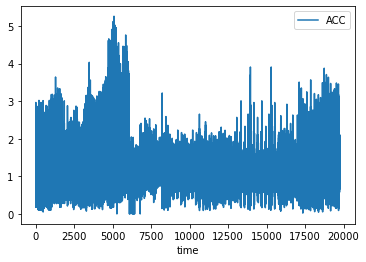

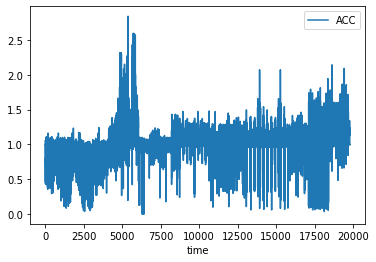

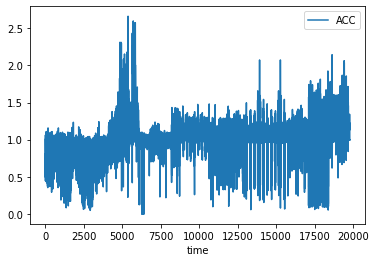

In [5]:
df1_acc_t_plot = df.plot.line(x='time',y='ACC')
df2_acc_t_plot = df2.plot.line(x='time',y='ACC')

#SAMPLES PLOT
df3 = df2.sample(frac=0.7, random_state=1)
df3.sort_index(inplace = True)
df3_acc_t_plot = df3.plot.line(x='time',y='ACC')

In [6]:
#X is the data: x,y,z
#Y is the class
acc_features_all = acc_features_all = ['x','y','z']
X = df3.loc[:,acc_features_all].values
Y = df3.loc[:,['class']].values


#---CLASS DISTRIBUTION---
count = len([elem for elem in Y if elem < 1])
print('0: ',count)
count = len([elem for elem in Y if elem > 0])
print('1: ', count)


#---ACTIVITY DISTRIBUTION---
class_count= df3.groupby('Activity').agg('count')
print(class_count, "\n")


#---CLASS DISTRIBUTION AFTER SMOTE---
smt = SMOTE()
X_smote, Y_smote = smt.fit_resample(X, Y)

count = len([elem for elem in Y_smote if elem < 1])
print('0: ',count)
count = len([elem for elem in Y_smote if elem > 0])
print('1: ', count)

0:  198191
1:  23346
               x       y       z    time    ba_x    ba_y    ba_z     g_x  \
Activity                                                                   
Running    14968   14968   14968   14968   14968   14968   14968   14968   
Sawing     24138   24138   24138   24138   24138   24138   24138   24138   
Seizure    23346   23346   23346   23346   23346   23346   23346   23346   
Still      29575   29575   29575   29575   29575   29575   29575   29575   
Walking   129510  129510  129510  129510  129510  129510  129510  129510   

             g_y     g_z      BA       G   class     ACC  
Activity                                                  
Running    14968   14968   14968   14968   14968   14968  
Sawing     24138   24138   24138   24138   24138   24138  
Seizure    23346   23346   23346   23346   23346   23346  
Still      29575   29575   29575   29575   29575   29575  
Walking   129510  129510  129510  129510  129510  129510   

0:  198191
1:  198191


<AxesSubplot:title={'center':'ACC'}, xlabel='class'>

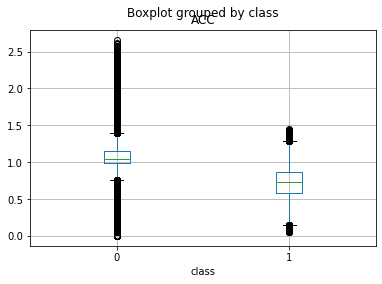

In [7]:
df3.boxplot('ACC', by='class')

In [8]:
df3.insert(13, 'time', df3.pop('time'))
df3.insert(12, 'ACC', df3.pop('ACC'))
df3.insert(14, 'class', df3.pop('class'))
df3.insert(14, 'Activity', df3.pop('Activity'))
df3

,x,y,z,ba_x,ba_y,ba_z,g_x,g_y,g_z,BA,G,ACC,time,class,Activity
16,-0.740000,-0.620000,0.272500,0.000002,0.000001,-0.000814,-0.47478,-0.397790,0.174490,0.000813,0.64351,1.003123,1,0,Still
17,-0.740000,-0.620000,0.272500,-0.000001,-0.000001,-0.005046,-0.47478,-0.397790,0.176500,0.005046,0.64406,1.003123,1,0,Still
18,-0.740000,-0.619375,0.272500,0.000000,0.003959,0.001542,-0.47478,-0.397570,0.178390,0.004249,0.64444,1.002737,1,0,Still
19,-0.740000,-0.619375,0.272500,-0.000000,-0.004957,0.000737,-0.47478,-0.396750,0.176160,0.005012,0.64332,1.002737,1,0,Still
21,-0.740000,-0.619375,0.273750,-0.000000,0.001499,-0.000817,-0.47478,-0.394860,0.174490,0.001707,0.64170,1.003077,1,0,Still
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316487,-0.978125,-0.061250,0.155000,0.004859,0.004867,-0.001060,-0.63203,-0.058780,0.099725,0.006958,0.64255,0.992222,19780,0,Walking
316488,-0.976250,-0.064375,0.156250,0.002506,0.000042,-0.003428,-0.63371,-0.059974,0.102440,0.004247,0.64473,0.990769,19780,0,Walking
316493,-0.978750,-0.083750,0.160625,0.004271,-0.000824,0.001130,-0.62855,-0.057744,0.107820,0.004494,0.64034,0.995372,19780,0,Walking
316494,-0.980000,-0.086875,0.160000,-0.005107,-0.003563,0.000934,-0.62773,-0.057963,0.105590,0.006297,0.63918,0.996768,19780,0,Walking


In [9]:
Xf = df3.iloc[:,0:12]  #independent columns
yf = df3.iloc[:,-2]    #target column

   Specs          Score
9     BA  140877.588272
11   ACC   79417.985635
10     G   10869.783256
1      y    3857.735207
7    g_y    2557.655125
2      z     267.740413
8    g_z     236.333347
0      x     209.668892
6    g_x     188.604939
4   ba_y       3.051323
5   ba_z       0.023961
3   ba_x       0.006413


<BarContainer object of 12 artists>

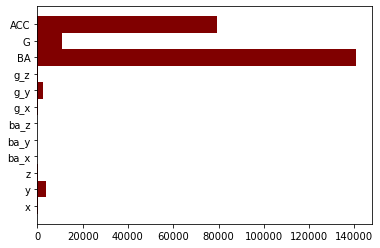

In [10]:
#UNIVARIATE SELECTION
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=12)
fit = bestfeatures.fit(Xf,yf)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xf.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

#plot graph of feature importances for better visualization
plt.barh(Xf.columns, featureScores.Score, color ='maroon',height=1)

In [11]:
Xf1_res_features = Xf1_res_features = ['ACC', 'G','BA']
Xf1_res = df3.loc[:,Xf1_res_features].values
Yf1_res = df3.loc[:,['class']].values
Xf1_res, Yf1_res = smt.fit_resample(Xf1_res, Yf1_res)

[0.06568623 0.07548502 0.03297995 0.03717796 0.15875148 0.06074657
 0.0565397  0.05300752 0.02664708 0.23079867 0.0480139  0.15416593]


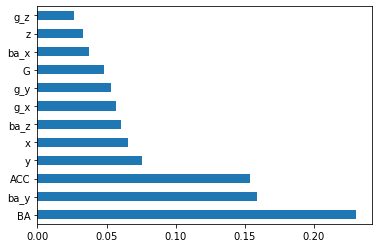

In [12]:
etc = ExtraTreesClassifier()
etc.fit(Xf,yf)
print(etc.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(etc.feature_importances_, index=Xf.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [13]:
Xf2_res_features = Xf2_res_features = ['ACC', 'ba_y','BA']
Xf2_res = df3.loc[:,Xf2_res_features].values
Yf2_res = df3.loc[:,['class']].values
Xf2_res, Yf2_res = smt.fit_resample(Xf2_res, Yf2_res)

In [14]:
df3.insert(13, 'time', df3.pop('time'))
time3 = df3['time']
act3 = df3['Activity']
df3.drop(columns=['time','Activity'],inplace=True)
df3

,x,y,z,ba_x,ba_y,ba_z,g_x,g_y,g_z,BA,G,ACC,class
16,-0.740000,-0.620000,0.272500,0.000002,0.000001,-0.000814,-0.47478,-0.397790,0.174490,0.000813,0.64351,1.003123,0
17,-0.740000,-0.620000,0.272500,-0.000001,-0.000001,-0.005046,-0.47478,-0.397790,0.176500,0.005046,0.64406,1.003123,0
18,-0.740000,-0.619375,0.272500,0.000000,0.003959,0.001542,-0.47478,-0.397570,0.178390,0.004249,0.64444,1.002737,0
19,-0.740000,-0.619375,0.272500,-0.000000,-0.004957,0.000737,-0.47478,-0.396750,0.176160,0.005012,0.64332,1.002737,0
21,-0.740000,-0.619375,0.273750,-0.000000,0.001499,-0.000817,-0.47478,-0.394860,0.174490,0.001707,0.64170,1.003077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316487,-0.978125,-0.061250,0.155000,0.004859,0.004867,-0.001060,-0.63203,-0.058780,0.099725,0.006958,0.64255,0.992222,0
316488,-0.976250,-0.064375,0.156250,0.002506,0.000042,-0.003428,-0.63371,-0.059974,0.102440,0.004247,0.64473,0.990769,0
316493,-0.978750,-0.083750,0.160625,0.004271,-0.000824,0.001130,-0.62855,-0.057744,0.107820,0.004494,0.64034,0.995372,0
316494,-0.980000,-0.086875,0.160000,-0.005107,-0.003563,0.000934,-0.62773,-0.057963,0.105590,0.006297,0.63918,0.996768,0


class    1.000000
BA       0.623475
x        0.030750
g_x      0.029166
ba_z     0.000329
ba_x    -0.000170
ba_y    -0.003711
g_z     -0.032644
z       -0.034743
g_y     -0.106833
y       -0.130827
G       -0.216266
ACC     -0.513701
Name: class, dtype: float64


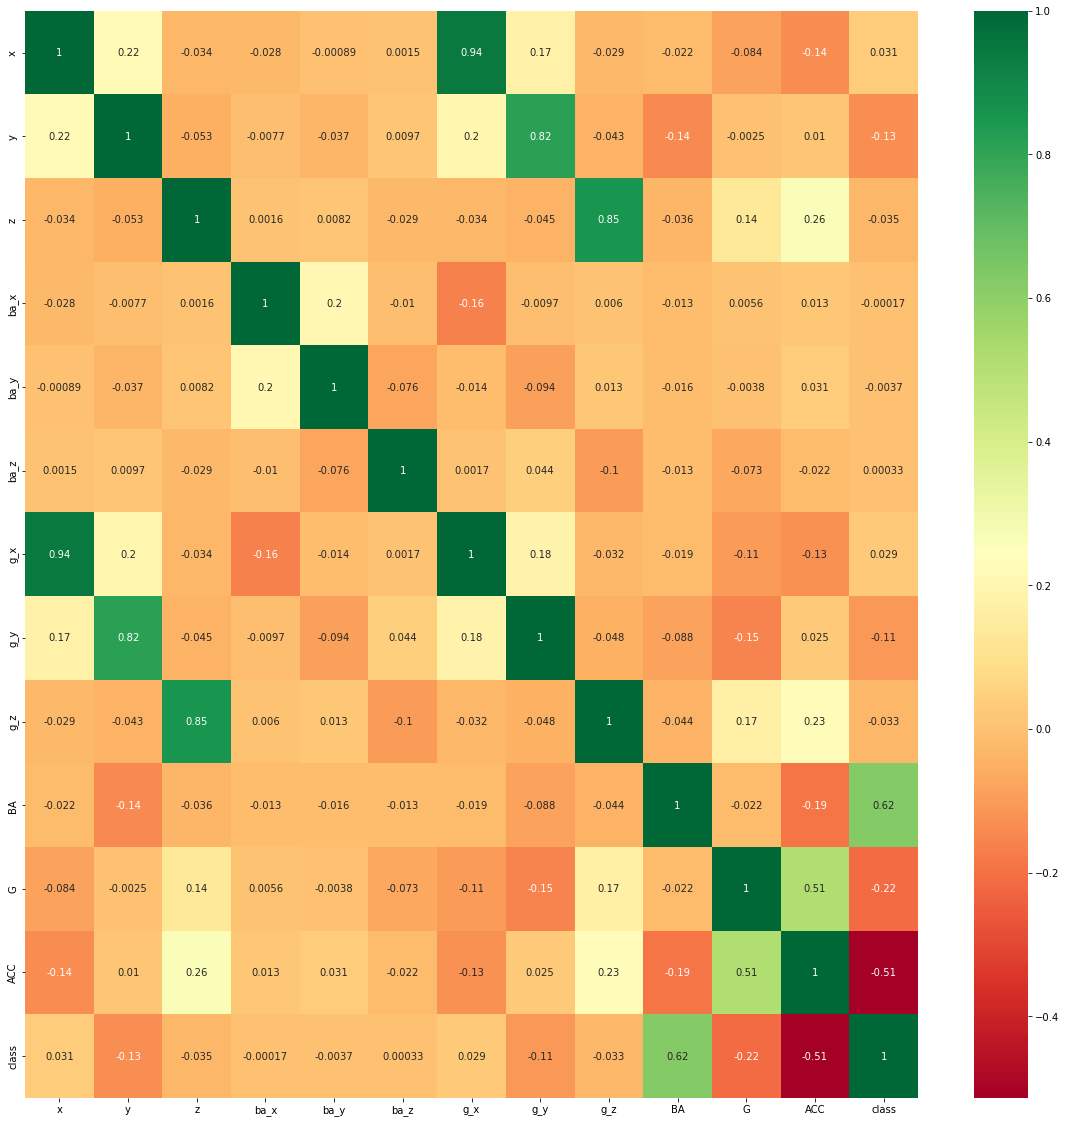

In [15]:
corrmat = df3[:].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#print corr in descending order
s =corrmat['class'].sort_values(ascending=False)
print(s)

In [16]:
df3['time'] = time3 
df3['Activity'] = act3 

Xf3_res_features = Xf3_res_features = ['g_x', 'x','BA']
Xf3_res = df3.loc[:,Xf3_res_features].values
Yf3_res = df3.loc[:,['class']].values
Xf3_res, Yf3_res = smt.fit_resample(Xf3_res, Yf3_res)

In [17]:
def eval_metrics(y_true):
    y_pred = cross_val_predict(clf_ob, X_test, Y_test.ravel(), cv=5)
    #PRINT TP,TN,FP,FN values
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
    print("True Positive: ",tp,"       True Negative: ",tn)
    print("False Positive: ",fp,"       False Negative: ",fn)
    print("Accuracy : ",round(accuracy_score(y_true, y_pred,),4))
    print("Precision : ",round(precision_score(y_true, y_pred,zero_division=1),4))
    print("Recall: ",round(recall_score(y_true, y_pred),4))
    print("F1 Score: ",round(f1_score(y_true, y_pred, zero_division=1),4))
    print("AUC-ROC Score: ", round(roc_auc_score(y_true, y_pred),4))

# Classification

### Features 1: Univariate Selection

In [18]:
#USE X_smote, Y_smote for X,Y,Z axis
#USE Xf1_res, Yf1_res
#USE Xf2_res, Yf2_res
X_train, X_test, Y_train, Y_test=train_test_split(Xf1_res, Yf1_res.ravel(),test_size=0.3)

In [19]:
clf_ob=svm.SVC(kernel='rbf', C=1, random_state = 42).fit(X_train,Y_train.ravel())
y_true = Y_test.ravel()

print("-----SVM RBF-----")
eval_metrics(y_true)
print("\n")

-----SVM RBF-----
True Positive:  55440        True Negative:  56633
False Positive:  2917        False Negative:  3925
Accuracy :  0.9425
Precision :  0.95
Recall:  0.9339
F1 Score:  0.9419
AUC-ROC Score:  0.9424




In [20]:
print("-----Logistic Regression-----")
clf_ob=LogisticRegression().fit(X_train,Y_train.ravel())
eval_metrics(y_true)
print("\n")

-----Logistic Regression-----
True Positive:  54259        True Negative:  55325
False Positive:  4225        False Negative:  5106
Accuracy :  0.9215
Precision :  0.9278
Recall:  0.914
F1 Score:  0.9208
AUC-ROC Score:  0.9215




In [21]:
print("-----Naive Bayes-----")
sc = StandardScaler()
X_train = sc.fit_transform(X_train,Y_train.ravel())
X_test = sc.transform(X_test)
classifier = GaussianNB()
classifier.fit(X_train,Y_train.ravel())
eval_metrics(y_true)
print("\n")

-----Naive Bayes-----
True Positive:  54270        True Negative:  55323
False Positive:  4227        False Negative:  5095
Accuracy :  0.9216
Precision :  0.9277
Recall:  0.9142
F1 Score:  0.9209
AUC-ROC Score:  0.9216




In [22]:
from sklearn.neighbors import KNeighborsClassifier
print("-----KNN-----")
clf_ob=KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train.ravel())
eval_metrics(y_true)

-----KNN-----
True Positive:  57188        True Negative:  55987
False Positive:  3563        False Negative:  2177
Accuracy :  0.9517
Precision :  0.9414
Recall:  0.9633
F1 Score:  0.9522
AUC-ROC Score:  0.9517


In [23]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
y_true = Y_test.ravel()

eval_metrics(y_true)

True Positive:  57188        True Negative:  55987
False Positive:  3563        False Negative:  2177
Accuracy :  0.9517
Precision :  0.9414
Recall:  0.9633
F1 Score:  0.9522
AUC-ROC Score:  0.9517


### Features 2: Feature Importance

In [24]:
#USE X_smote, Y_smote for X,Y,Z axis
#USE Xf1_res, Yf1_res
#USE Xf2_res, Yf2_res
X_train, X_test, Y_train, Y_test=train_test_split(Xf2_res, Yf2_res.ravel(),test_size=0.3)

In [25]:
clf_ob=svm.SVC(kernel='rbf', C=1, random_state = 42).fit(X_train,Y_train.ravel())
y_true = Y_test.ravel()

print("-----SVM RBF-----")
eval_metrics(y_true)
print("\n")

-----SVM RBF-----
True Positive:  55271        True Negative:  56678
False Positive:  2757        False Negative:  4209
Accuracy :  0.9414
Precision :  0.9525
Recall:  0.9292
F1 Score:  0.9407
AUC-ROC Score:  0.9414




In [26]:
print("-----Logistic Regression-----")
clf_ob=LogisticRegression().fit(X_train,Y_train.ravel())
eval_metrics(y_true)
print("\n")

-----Logistic Regression-----
True Positive:  54472        True Negative:  55270
False Positive:  4165        False Negative:  5008
Accuracy :  0.9229
Precision :  0.929
Recall:  0.9158
F1 Score:  0.9223
AUC-ROC Score:  0.9229




In [27]:
print("-----Naive Bayes-----")
sc = StandardScaler()
X_train = sc.fit_transform(X_train,Y_train.ravel())
X_test = sc.transform(X_test)
classifier = GaussianNB()
classifier.fit(X_train,Y_train.ravel())
eval_metrics(y_true)
print("\n")

-----Naive Bayes-----
True Positive:  54486        True Negative:  55268
False Positive:  4167        False Negative:  4994
Accuracy :  0.923
Precision :  0.929
Recall:  0.916
F1 Score:  0.9225
AUC-ROC Score:  0.923




In [28]:
from sklearn.neighbors import KNeighborsClassifier
print("-----KNN-----")
clf_ob=KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train.ravel())
eval_metrics(y_true)

-----KNN-----
True Positive:  57183        True Negative:  55940
False Positive:  3495        False Negative:  2297
Accuracy :  0.9513
Precision :  0.9424
Recall:  0.9614
F1 Score:  0.9518
AUC-ROC Score:  0.9513


In [29]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
y_true = Y_test.ravel()

eval_metrics(y_true)

True Positive:  57183        True Negative:  55940
False Positive:  3495        False Negative:  2297
Accuracy :  0.9513
Precision :  0.9424
Recall:  0.9614
F1 Score:  0.9518
AUC-ROC Score:  0.9513


### Features 3: Heat Map

In [30]:
#USE X_smote, Y_smote for X,Y,Z axis
#USE Xf1_res, Yf1_res
#USE Xf2_res, Yf2_res
X_train, X_test, Y_train, Y_test=train_test_split(Xf3_res, Yf3_res.ravel(),test_size=0.3)

In [31]:
clf_ob=svm.SVC(kernel='rbf', C=1, random_state = 42).fit(X_train,Y_train.ravel())
y_true = Y_test.ravel()

print("-----SVM RBF-----")
eval_metrics(y_true)
print("\n")

-----SVM RBF-----
True Positive:  56203        True Negative:  54766
False Positive:  4564        False Negative:  3382
Accuracy :  0.9332
Precision :  0.9249
Recall:  0.9432
F1 Score:  0.934
AUC-ROC Score:  0.9332




In [32]:
print("-----Logistic Regression-----")
clf_ob=LogisticRegression().fit(X_train,Y_train.ravel())
eval_metrics(y_true)
print("\n")

-----Logistic Regression-----
True Positive:  47317        True Negative:  53526
False Positive:  5804        False Negative:  12268
Accuracy :  0.848
Precision :  0.8907
Recall:  0.7941
F1 Score:  0.8397
AUC-ROC Score:  0.8481




In [33]:
print("-----Naive Bayes-----")
sc = StandardScaler()
X_train = sc.fit_transform(X_train,Y_train.ravel())
X_test = sc.transform(X_test)
classifier = GaussianNB()
classifier.fit(X_train,Y_train.ravel())
eval_metrics(y_true)
print("\n")

-----Naive Bayes-----
True Positive:  47326        True Negative:  53524
False Positive:  5806        False Negative:  12259
Accuracy :  0.8481
Precision :  0.8907
Recall:  0.7943
F1 Score:  0.8397
AUC-ROC Score:  0.8482




In [34]:
from sklearn.neighbors import KNeighborsClassifier
print("-----KNN-----")
clf_ob=KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train.ravel())
eval_metrics(y_true)

-----KNN-----
True Positive:  57824        True Negative:  55093
False Positive:  4237        False Negative:  1761
Accuracy :  0.9496
Precision :  0.9317
Recall:  0.9704
F1 Score:  0.9507
AUC-ROC Score:  0.9495


In [35]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
y_true = Y_test.ravel()

eval_metrics(y_true)

True Positive:  57824        True Negative:  55093
False Positive:  4237        False Negative:  1761
Accuracy :  0.9496
Precision :  0.9317
Recall:  0.9704
F1 Score:  0.9507
AUC-ROC Score:  0.9495


### Axes x, y, z

In [36]:
#USE X_smote, Y_smote for X,Y,Z axis
#USE Xf1_res, Yf1_res
#USE Xf2_res, Yf2_res
X_train, X_test, Y_train, Y_test=train_test_split(X_smote, Y_smote.ravel(),test_size=0.3)

In [37]:
clf_ob=svm.SVC(kernel='rbf', C=1, random_state = 42).fit(X_train,Y_train.ravel())
y_true = Y_test.ravel()

print("-----SVM RBF-----")
eval_metrics(y_true)
print("\n")

-----SVM RBF-----
True Positive:  57432        True Negative:  54536
False Positive:  4981        False Negative:  1966
Accuracy :  0.9416
Precision :  0.9202
Recall:  0.9669
F1 Score:  0.943
AUC-ROC Score:  0.9416




In [38]:
print("-----Logistic Regression-----")
clf_ob=LogisticRegression().fit(X_train,Y_train.ravel())
eval_metrics(y_true)
print("\n")

-----Logistic Regression-----
True Positive:  42507        True Negative:  35756
False Positive:  23761        False Negative:  16891
Accuracy :  0.6581
Precision :  0.6414
Recall:  0.7156
F1 Score:  0.6765
AUC-ROC Score:  0.6582




In [39]:
print("-----Naive Bayes-----")
sc = StandardScaler()
X_train = sc.fit_transform(X_train,Y_train.ravel())
X_test = sc.transform(X_test)
classifier = GaussianNB()
classifier.fit(X_train,Y_train.ravel())
eval_metrics(y_true)
print("\n")

-----Naive Bayes-----
True Positive:  42504        True Negative:  35756
False Positive:  23761        False Negative:  16894
Accuracy :  0.6581
Precision :  0.6414
Recall:  0.7156
F1 Score:  0.6765
AUC-ROC Score:  0.6582




In [40]:
from sklearn.neighbors import KNeighborsClassifier
print("-----KNN-----")
clf_ob=KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train.ravel())
eval_metrics(y_true)

-----KNN-----
True Positive:  58479        True Negative:  55701
False Positive:  3816        False Negative:  919
Accuracy :  0.9602
Precision :  0.9387
Recall:  0.9845
F1 Score:  0.9611
AUC-ROC Score:  0.9602


In [41]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
y_true = Y_test.ravel()

eval_metrics(y_true)

True Positive:  58479        True Negative:  55701
False Positive:  3816        False Negative:  919
Accuracy :  0.9602
Precision :  0.9387
Recall:  0.9845
F1 Score:  0.9611
AUC-ROC Score:  0.9602
